# Group 31: Xinyu Xiong, Yueling Feng, Yuxin Yang, Yixuan Deng

## Deaths caused by different diseases
### data source：https://data.cdc.gov/NCHS/AH-Monthly-Provisional-Counts-of-Deaths-for-Select/65mz-jvh5/data
### disease sources:https://www.cdc.gov/coronavirus/2019-ncov/science/science-briefs/underlying-evidence-table.html
### population： https://www.visualcapitalist.com/visualizing-u-s-population-by-race/

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv ('C:/Users/yang/Desktop/race data.csv',encoding='latin1')
df

,ï»¿Date Of Death Year,Date Of Death Month,Sex,Race/Ethnicity,AgeGroup,AllCause,NaturalCaus,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),...,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod,Start Date,End Date,Jurisdiction of Occurrence
0,2019,1,F,Hispanic,0-4 years,182,162.0,NaN,NaN,0.0,...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,Counts between 1-9 have been suppressed in acc...,NaN,NaN,NaN,01/01/2019,01/31/2019,United States
1,2019,1,F,Hispanic,5-14 years,44,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2019,01/31/2019,United States
2,2019,1,F,Hispanic,15-24 years,122,45.0,0.0,NaN,NaN,...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,01/01/2019,01/31/2019,United States
3,2019,1,F,Hispanic,25-34 years,198,100.0,NaN,29,NaN,...,Counts between 1-9 have been suppressed in acc...,NaN,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,01/01/2019,01/31/2019,United States
4,2019,1,F,Hispanic,35-44 years,334,260.0,NaN,96,NaN,...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,NaN,NaN,01/01/2019,01/31/2019,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,2021,4,Male,Other,45-54 years,97,88.0,0.0,12,NaN,...,NaN,NaN,NaN,NaN,Counts between 1-9 have been suppressed in acc...,NaN,Counts between 1-9 have been suppressed in acc...,04/01/2021,04/30/2021,United States
3356,2021,4,Male,Other,55-64 years,188,174.0,NaN,42,NaN,...,NaN,Counts between 1-9 have been suppressed in acc...,NaN,NaN,Counts between 1-9 have been suppressed in acc...,NaN,NaN,04/01/2021,04/30/2021,United States
3357,2021,4,Male,Other,65-74 years,206,200.0,NaN,49,12.0,...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,Counts between 1-9 have been suppressed in acc...,NaN,NaN,04/01/2021,04/30/2021,United States
3358,2021,4,Male,Other,75-84 years,155,149.0,NaN,22,NaN,...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,NaN,NaN,Counts between 1-9 have been suppressed in acc...,Counts between 1-9 have been suppressed in acc...,04/01/2021,04/30/2021,United States


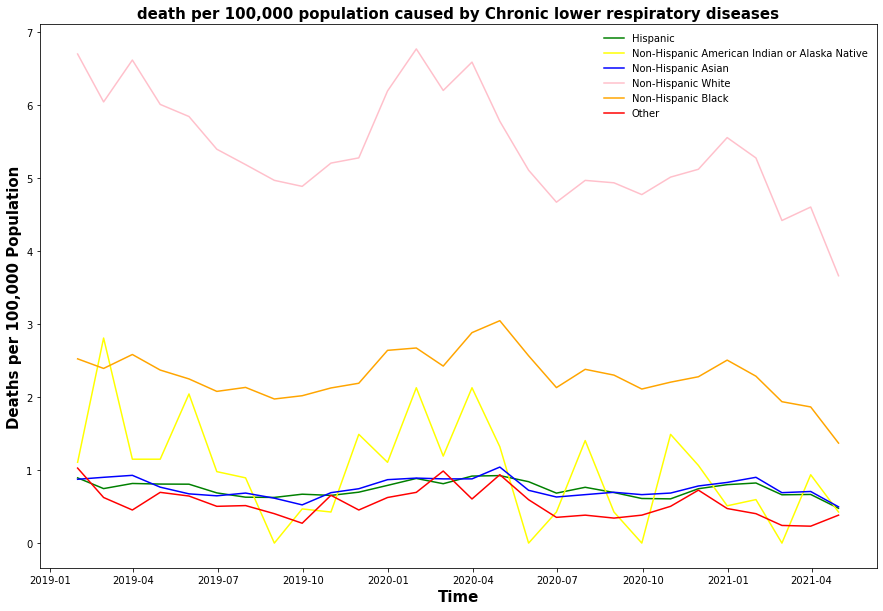

In [8]:
##Chronic lower respiratory diseases (J40-J47)

dfsep = df.groupby(['Race/Ethnicity','End Date'],as_index=False).agg({'Chronic lower respiratory diseases (J40-J47)': 'sum'})
dfsep['End Date'] = pd.to_datetime(dfsep['End Date'], format='%m/%d/%Y')
dfsep = dfsep.sort_values(by='End Date')

Hispanic_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Hispanic']
Hispanic_s=Hispanic_s.drop(columns=["Race/Ethnicity"])
Hispanic_s['rate']=Hispanic_s['Chronic lower respiratory diseases (J40-J47)']/(0.185*331000000)*100000



AIorAN_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native']
AIorAN_s=AIorAN_s.drop(columns=["Race/Ethnicity"])
AIorAN_s['rate']=AIorAN_s['Chronic lower respiratory diseases (J40-J47)']/(0.0071*331000000)*100000

Asian_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Asian']
Asian_s=Asian_s.drop(columns=["Race/Ethnicity"])
Asian_s['rate']=Asian_s['Chronic lower respiratory diseases (J40-J47)']/(0.056*331000000)*100000

White_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic White']
White_s=White_s.drop(columns=["Race/Ethnicity"])
White_s['rate']=White_s['Chronic lower respiratory diseases (J40-J47)']/(0.601*331000000)*100000

Black_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Black']
Black_s=Black_s.drop(columns=["Race/Ethnicity"])
Black_s['rate']=Black_s['Chronic lower respiratory diseases (J40-J47)']/(0.122*331000000)*100000

Other_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Other']
Other_s=Other_s.drop(columns=["Race/Ethnicity"])
Other_s['rate']=Other_s['Chronic lower respiratory diseases (J40-J47)']/(0.03*331000000)*100000

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(15, 10)

ax.plot(Hispanic_s['End Date'], Hispanic_s["rate"], color = 'green', label = 'Hispanic')
ax.plot(AIorAN_s['End Date'], AIorAN_s["rate"],color = 'yellow', label = 'Non-Hispanic American Indian or Alaska Native')
ax.plot(Asian_s['End Date'], Asian_s["rate"], color = 'blue', label = 'Non-Hispanic Asian')
ax.plot(White_s['End Date'], White_s["rate"], color = 'pink', label = 'Non-Hispanic White')
ax.plot(Black_s['End Date'], Black_s["rate"], color = 'orange', label = 'Non-Hispanic Black')
ax.plot(Other_s['End Date'], Other_s["rate"], color = 'red', label = 'Other')

ax.legend(loc = 'upper right',frameon=False)
plt.title('death per 100,000 population caused by Chronic lower respiratory diseases', fontweight ='bold', fontsize = 15)
plt.xlabel("Time", fontweight ='bold', fontsize = 15)
plt.ylabel("Deaths per 100,000 Population", fontweight ='bold', fontsize = 15)
plt.show()



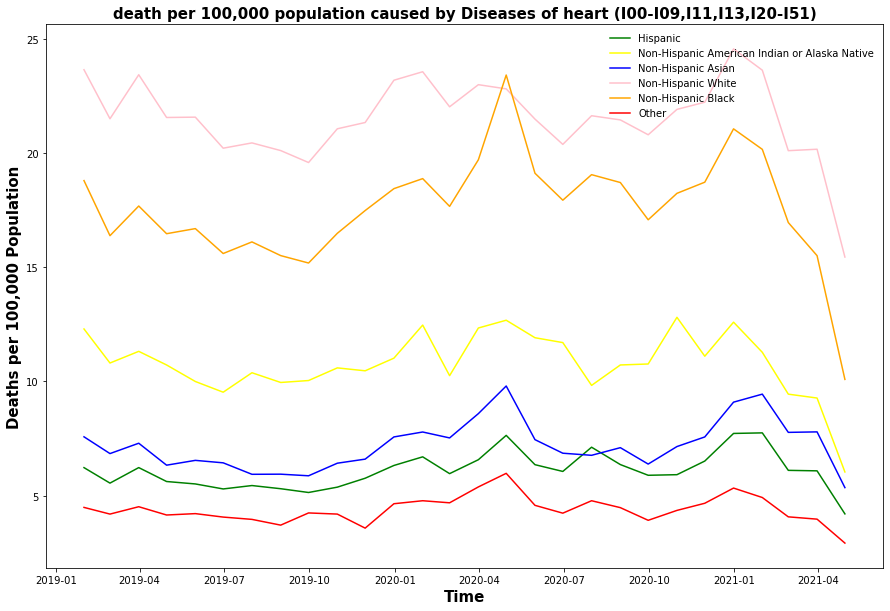

In [9]:
##Diseases of heart (I00-I09,I11,I13,I20-I51)
dfsep = df.groupby(['Race/Ethnicity','End Date'],as_index=False).agg({'Diseases of heart (I00-I09,I11,I13,I20-I51)': 'sum'})
dfsep['End Date'] = pd.to_datetime(dfsep['End Date'], format='%m/%d/%Y')
dfsep = dfsep.sort_values(by='End Date')

Hispanic_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Hispanic']
Hispanic_s=Hispanic_s.drop(columns=["Race/Ethnicity"])
Hispanic_s['rate']=Hispanic_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.185*331000000)*100000



AIorAN_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native']
AIorAN_s=AIorAN_s.drop(columns=["Race/Ethnicity"])
AIorAN_s['rate']=AIorAN_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.0071*331000000)*100000

Asian_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Asian']
Asian_s=Asian_s.drop(columns=["Race/Ethnicity"])
Asian_s['rate']=Asian_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.056*331000000)*100000

White_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic White']
White_s=White_s.drop(columns=["Race/Ethnicity"])
White_s['rate']=White_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.601*331000000)*100000

Black_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Black']
Black_s=Black_s.drop(columns=["Race/Ethnicity"])
Black_s['rate']=Black_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.122*331000000)*100000

Other_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Other']
Other_s=Other_s.drop(columns=["Race/Ethnicity"])
Other_s['rate']=Other_s['Diseases of heart (I00-I09,I11,I13,I20-I51)']/(0.03*331000000)*100000

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(15, 10)

ax.plot(Hispanic_s['End Date'], Hispanic_s["rate"], color = 'green', label = 'Hispanic')
ax.plot(AIorAN_s['End Date'], AIorAN_s["rate"],color = 'yellow', label = 'Non-Hispanic American Indian or Alaska Native')
ax.plot(Asian_s['End Date'], Asian_s["rate"], color = 'blue', label = 'Non-Hispanic Asian')
ax.plot(White_s['End Date'], White_s["rate"], color = 'pink', label = 'Non-Hispanic White')
ax.plot(Black_s['End Date'], Black_s["rate"], color = 'orange', label = 'Non-Hispanic Black')
ax.plot(Other_s['End Date'], Other_s["rate"], color = 'red', label = 'Other')

ax.legend(loc = 'upper right',frameon=False)
plt.title('death per 100,000 population caused by Diseases of heart (I00-I09,I11,I13,I20-I51)', fontweight ='bold', fontsize = 15)
plt.xlabel("Time", fontweight ='bold', fontsize = 15)
plt.ylabel("Deaths per 100,000 Population", fontweight ='bold', fontsize = 15)
plt.show()

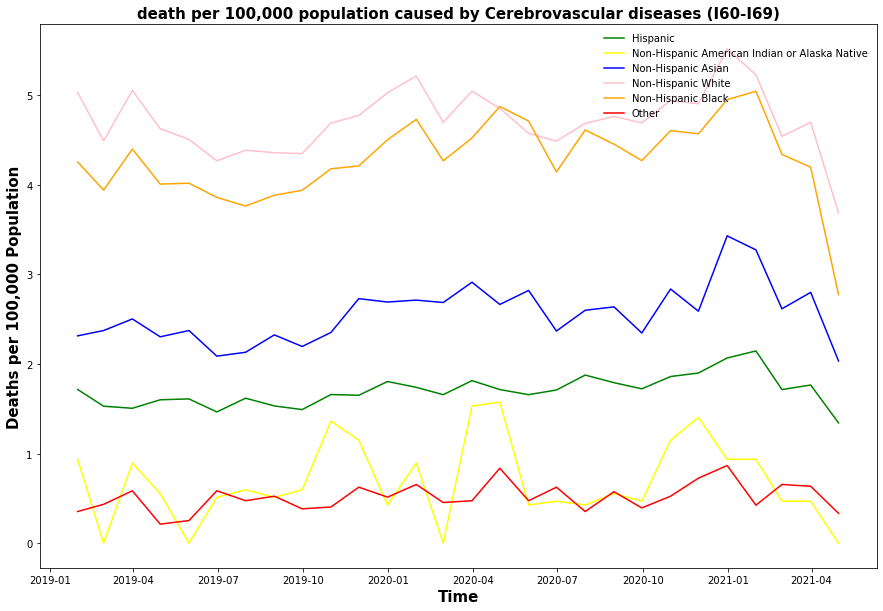

In [10]:
##Cerebrovascular diseases (I60-I69)
dfsep = df.groupby(['Race/Ethnicity','End Date'],as_index=False).agg({'Cerebrovascular diseases (I60-I69)': 'sum'})
dfsep['End Date'] = pd.to_datetime(dfsep['End Date'], format='%m/%d/%Y')
dfsep = dfsep.sort_values(by='End Date')

Hispanic_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Hispanic']
Hispanic_s=Hispanic_s.drop(columns=["Race/Ethnicity"])
Hispanic_s['rate']=Hispanic_s['Cerebrovascular diseases (I60-I69)']/(0.185*331000000)*100000



AIorAN_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native']
AIorAN_s=AIorAN_s.drop(columns=["Race/Ethnicity"])
AIorAN_s['rate']=AIorAN_s['Cerebrovascular diseases (I60-I69)']/(0.0071*331000000)*100000

Asian_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Asian']
Asian_s=Asian_s.drop(columns=["Race/Ethnicity"])
Asian_s['rate']=Asian_s['Cerebrovascular diseases (I60-I69)']/(0.056*331000000)*100000

White_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic White']
White_s=White_s.drop(columns=["Race/Ethnicity"])
White_s['rate']=White_s['Cerebrovascular diseases (I60-I69)']/(0.601*331000000)*100000

Black_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Black']
Black_s=Black_s.drop(columns=["Race/Ethnicity"])
Black_s['rate']=Black_s['Cerebrovascular diseases (I60-I69)']/(0.122*331000000)*100000

Other_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Other']
Other_s=Other_s.drop(columns=["Race/Ethnicity"])
Other_s['rate']=Other_s['Cerebrovascular diseases (I60-I69)']/(0.03*331000000)*100000

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(15, 10)

ax.plot(Hispanic_s['End Date'], Hispanic_s["rate"], color = 'green', label = 'Hispanic')
ax.plot(AIorAN_s['End Date'], AIorAN_s["rate"],color = 'yellow', label = 'Non-Hispanic American Indian or Alaska Native')
ax.plot(Asian_s['End Date'], Asian_s["rate"], color = 'blue', label = 'Non-Hispanic Asian')
ax.plot(White_s['End Date'], White_s["rate"], color = 'pink', label = 'Non-Hispanic White')
ax.plot(Black_s['End Date'], Black_s["rate"], color = 'orange', label = 'Non-Hispanic Black')
ax.plot(Other_s['End Date'], Other_s["rate"], color = 'red', label = 'Other')

ax.legend(loc = 'upper right',frameon=False)
plt.title('death per 100,000 population caused by Cerebrovascular diseases (I60-I69)', fontweight ='bold', fontsize = 15)
plt.xlabel("Time", fontweight ='bold', fontsize = 15)
plt.ylabel("Deaths per 100,000 Population", fontweight ='bold', fontsize = 15)
plt.show()

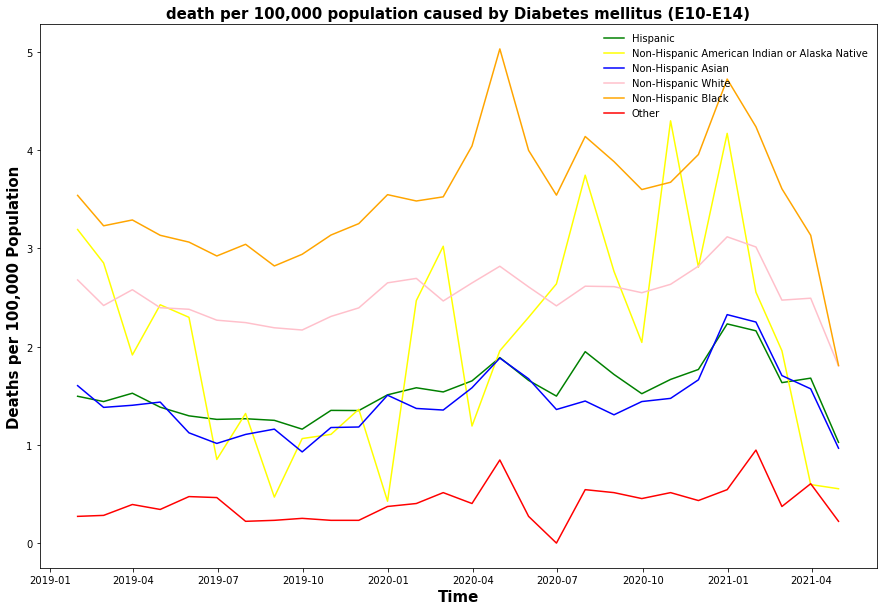

In [11]:
##Diabetes mellitus (E10-E14)
dfsep = df.groupby(['Race/Ethnicity','End Date'],as_index=False).agg({'Diabetes mellitus (E10-E14)': 'sum'})
dfsep['End Date'] = pd.to_datetime(dfsep['End Date'], format='%m/%d/%Y')
dfsep = dfsep.sort_values(by='End Date')

Hispanic_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Hispanic']
Hispanic_s=Hispanic_s.drop(columns=["Race/Ethnicity"])
Hispanic_s['rate']=Hispanic_s['Diabetes mellitus (E10-E14)']/(0.185*331000000)*100000



AIorAN_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic American Indian or Alaska Native']
AIorAN_s=AIorAN_s.drop(columns=["Race/Ethnicity"])
AIorAN_s['rate']=AIorAN_s['Diabetes mellitus (E10-E14)']/(0.0071*331000000)*100000

Asian_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Asian']
Asian_s=Asian_s.drop(columns=["Race/Ethnicity"])
Asian_s['rate']=Asian_s['Diabetes mellitus (E10-E14)']/(0.056*331000000)*100000

White_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic White']
White_s=White_s.drop(columns=["Race/Ethnicity"])
White_s['rate']=White_s['Diabetes mellitus (E10-E14)']/(0.601*331000000)*100000

Black_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Non-Hispanic Black']
Black_s=Black_s.drop(columns=["Race/Ethnicity"])
Black_s['rate']=Black_s['Diabetes mellitus (E10-E14)']/(0.122*331000000)*100000

Other_s=dfsep.loc[dfsep['Race/Ethnicity'] == 'Other']
Other_s=Other_s.drop(columns=["Race/Ethnicity"])
Other_s['rate']=Other_s['Diabetes mellitus (E10-E14)']/(0.03*331000000)*100000

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(15, 10)

ax.plot(Hispanic_s['End Date'], Hispanic_s["rate"], color = 'green', label = 'Hispanic')
ax.plot(AIorAN_s['End Date'], AIorAN_s["rate"],color = 'yellow', label = 'Non-Hispanic American Indian or Alaska Native')
ax.plot(Asian_s['End Date'], Asian_s["rate"], color = 'blue', label = 'Non-Hispanic Asian')
ax.plot(White_s['End Date'], White_s["rate"], color = 'pink', label = 'Non-Hispanic White')
ax.plot(Black_s['End Date'], Black_s["rate"], color = 'orange', label = 'Non-Hispanic Black')
ax.plot(Other_s['End Date'], Other_s["rate"], color = 'red', label = 'Other')

ax.legend(loc = 'upper right',frameon=False)
plt.title('death per 100,000 population caused by Diabetes mellitus (E10-E14)', fontweight ='bold', fontsize = 15)
plt.xlabel("Time", fontweight ='bold', fontsize = 15)
plt.ylabel("Deaths per 100,000 Population", fontweight ='bold', fontsize = 15)
plt.show()